In [1]:
# get dataset

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/  #get api token before running this 

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d moltean/fruits  #kaggle datasets download -d paultimothymooney/blood-cells

100% 1.28G/1.28G [00:57<00:00, 24.0MB/s]
100% 1.28G/1.28G [00:57<00:00, 24.0MB/s]


In [7]:
! mkdir data

In [8]:
! unzip fruits.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato 3/123

In [9]:
#import libraries

In [11]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model

# getting the pretrained model 
from keras.applications.vgg16 import VGG16,preprocess_input  #xception 

from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from keras import utils

from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from glob import glob


In [12]:
image_size=[100,100] 

In [13]:
epochs=5
batch_size=32

In [14]:
train_path='/content/data/fruits-360-original-size/fruits-360-original-size/Training'
valid_path='/content/data/fruits-360-original-size/fruits-360-original-size/Validation'

In [15]:
image_files=glob(train_path+'/*/*.jp*g') #jpg, jp*g
valid_files=glob(valid_path+'/*/*.jp*g')

In [16]:
len(image_files),image_files[0]

(6231,
 '/content/data/fruits-360-original-size/fruits-360-original-size/Training/apple_red_3/r0_190.jpg')

In [17]:
folders=glob(train_path+'/*')

In [18]:
len(folders) #number of classes

24

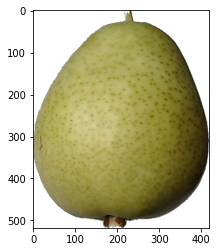

In [20]:
plt.imshow(utils.load_img(image_files[567]))
plt.show();

In [21]:
#build model 

In [30]:
image_size+[3]

[100, 100, 3]

In [64]:
vgg=VGG16(input_shape=(None,None,3),weights='imagenet',include_top=False)

In [65]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [37]:
for layer in vgg.layers:
  layer.trainable=False # == #fe

In [38]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
vgg.output

<KerasTensor: shape=(None, 3, 3, 512) dtype=float32 (created by layer 'block5_pool')>

In [39]:

x=Flatten()(vgg.output)

x=Dense(len(folders),activation='softmax')(x) 

In [40]:
model=Model(vgg.input,x)

In [41]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [42]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [43]:
gen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input

)

In [44]:
test_gen=gen.flow_from_directory(valid_path,target_size=image_size)
print(test_gen.class_indices)

Found 3114 images belonging to 24 classes.
{'apple_6': 0, 'apple_braeburn_1': 1, 'apple_crimson_snow_1': 2, 'apple_golden_1': 3, 'apple_golden_2': 4, 'apple_golden_3': 5, 'apple_granny_smith_1': 6, 'apple_hit_1': 7, 'apple_pink_lady_1': 8, 'apple_red_1': 9, 'apple_red_2': 10, 'apple_red_3': 11, 'apple_red_delicios_1': 12, 'apple_red_yellow_1': 13, 'apple_rotten_1': 14, 'cabbage_white_1': 15, 'carrot_1': 16, 'cucumber_1': 17, 'cucumber_3': 18, 'eggplant_violet_1': 19, 'pear_1': 20, 'pear_3': 21, 'zucchini_1': 22, 'zucchini_dark_1': 23}


In [69]:
labels=[5]*len(test_gen.class_indices) #simple list init
for k,v in test_gen.class_indices.items():
  labels[v]=k

In [70]:
labels

['apple_6',
 'apple_braeburn_1',
 'apple_crimson_snow_1',
 'apple_golden_1',
 'apple_golden_2',
 'apple_golden_3',
 'apple_granny_smith_1',
 'apple_hit_1',
 'apple_pink_lady_1',
 'apple_red_1',
 'apple_red_2',
 'apple_red_3',
 'apple_red_delicios_1',
 'apple_red_yellow_1',
 'apple_rotten_1',
 'cabbage_white_1',
 'carrot_1',
 'cucumber_1',
 'cucumber_3',
 'eggplant_violet_1',
 'pear_1',
 'pear_3',
 'zucchini_1',
 'zucchini_dark_1']

In [52]:
# actual generators

In [53]:
train_generator=gen.flow_from_directory(train_path,target_size=image_size,shuffle=True
                                        ,batch_size=batch_size)
valid_generator=gen.flow_from_directory(valid_path,target_size=image_size,shuffle=True
                                        ,batch_size=batch_size)


Found 6231 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.


In [54]:
r=model.fit(train_generator,validation_data=valid_generator,
                      epochs=1,steps_per_epoch=len(image_files)//batch_size,
                      validation_steps=len(valid_files)//batch_size)

194/194 [==============================] - 72s 328ms/step - loss: 2.8349 - accuracy: 0.8055 - val_loss: 0.6808 - val_accuracy: 0.9285


In [55]:
# confusion matrix 

In [57]:
def get_cm(data_path,n):
  predictions=[]
  targets=[]
  i=0
  for x,y in gen.flow_from_directory(data_path,target_size=image_size,
                                     shuffle=False,batch_size=batch_size*2):
    i=i+1
    if(i%50==0):
      print(i)
    
    p=model.predict(x)
    p=np.argmax(p,axis=1)
    y=np.argmax(y,axis=1)

    predictions=np.concatenate((predictions,p))
    targets=np.concatenate((targets,y))

    if(len(targets)>=n):
      break
  cm=confusion_matrix(targets,predictions)
  return cm 

In [58]:
valid_path_new='/content/data/fruits-360-original-size/fruits-360-original-size/Validation/apple_6'

In [59]:
cm=get_cm(valid_path,len(valid_files))
print(cm)

Found 3114 images belonging to 24 classes.
2/2 [==============================] - 1s 482ms/step
[[155   0   0   0   0   0   2   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 140   1   0   0   0   0   0   6   2   0   0  11   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   2 131   0   0   0   0   0  14   3   0   2   6   0   1   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 153   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 122  17  12   1   1   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0]
 [  0   0   0   0   3 120  30   0   0   0   0   0   0   0   0   0   0   0
    0   0   5   0   0   0]
 [  0   0   0   0   0   0 160   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  6   0   0   0   0   0   0 226   1   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0]
 [  0   0   3   0   0   0   0   0 152   0   0   0   1   0   0   0   0   0
    0   0   0   0   0 

In [60]:
import seaborn as sns

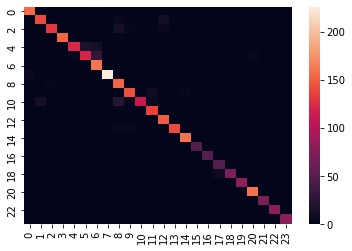

In [61]:
sns.heatmap(cm)

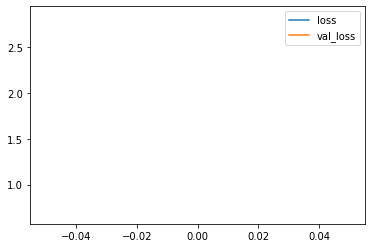

In [63]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()